**Modified TextRank with BERT**

In [36]:
pip install bert-embedding

In [25]:
import nltk
import string
from nltk import sent_tokenize
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from bert_embedding import BertEmbedding

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
bert_embedding = BertEmbedding(model='bert_24_1024_16', dataset_name='book_corpus_wiki_en_cased')

In [27]:
from google.colab import files
uploaded = files.upload()

Saving CricketLong.txt to CricketLong.txt


In [39]:
#Obtaining sentence embeddings for the given dataset
dataset = "CricketLong.txt"

def load_dataset(dataset):
  file = open(dataset,'r',encoding='cp1252')
  text = file.read()  #contains the dataset as a string
  file.close()
  return text

doc = load_dataset(dataset)
sentences = sent_tokenize(doc)
print("Length of the document: " + str(len(sentences))+" sentences")
sentence_embeddings = bert_embedding(sentences)


Length of the document: 68 sentences


In [29]:
#Embedding description
print("No. of rows:" + str(len(sentence_embeddings)))
print("No. of columns:" + str(len(sentence_embeddings[0])))

#FORMAT: [sentence, a list of word vectors for all the words in that sentence]
print("First row first element:"+ str(sentence_embeddings[0][0]))
print("First row second/last element:"+str(sentence_embeddings[0][1]))

No. of rows:68
No. of columns:2
First row first element:['Cricket', 'grew', 'out', 'of', 'the', 'many', 'stick', '-', 'and', '-', 'ball', 'games', 'played', 'in', 'England', '500', 'years', 'ago', ',', 'under', 'a', 'variety', 'of']
First row second/last element:[array([-0.3858722 , -0.9713379 , -0.12957332, ..., -0.5178542 ,
        0.4908099 , -0.481709  ], dtype=float32), array([ 0.7472697 ,  0.35637993, -0.14607152, ...,  0.17045361,
        0.52243084,  0.14161864], dtype=float32), array([ 0.52431506,  0.35756743,  0.07570478, ..., -0.00314844,
        0.00417138,  1.0115591 ], dtype=float32), array([ 0.52227986, -0.81501806,  0.2779304 , ..., -1.0448387 ,
        0.09699552,  1.0101553 ], dtype=float32), array([ 0.28862113,  0.48331165,  0.52089775, ..., -0.17543364,
        0.9904743 , -0.11651127], dtype=float32), array([ 0.88431966,  0.59064883,  0.6300146 , ..., -0.26602978,
        0.46355465,  0.45404136], dtype=float32), array([ 0.05487929,  0.51478124, -0.668601  , ..., -

In [30]:
sentence_vectors = []

for item in sentence_embeddings:
  sentence_vectors.append(item[1])

print(len(sentence_vectors))

68


In [31]:
#Forming Cosine Similarity Matrix
def get_similarity_matrix(sentences):
  sent_count = len(sentences)
  sim_mat = np.zeros([sent_count, sent_count])  #creating a symmetric zeros matrix
  for i in range(sent_count):
      for j in range(sent_count):
          if i != j:
            #cosine_similarity() takes two matrices,so reshaping list items to 1D vectors. The resulting matrix is of 1x1. Storing that value in i,j position of sim_mat 
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i],sentence_vectors[j])[0,0]
  sim_mat = np.round(sim_mat,4) #rounding off upto three decimal places
  return sim_mat

sim_mat = get_similarity_matrix(sentences)
print(sim_mat)

[[0.     0.9504 0.9598 ... 0.9496 0.9647 0.9591]
 [0.9504 0.     0.9402 ... 0.9297 0.9475 0.9551]
 [0.9598 0.9402 0.     ... 0.9409 0.981  0.9729]
 ...
 [0.9496 0.9297 0.9409 ... 0.     0.944  0.9418]
 [0.9647 0.9475 0.981  ... 0.944  0.     0.9744]
 [0.9591 0.9551 0.9729 ... 0.9418 0.9744 0.    ]]


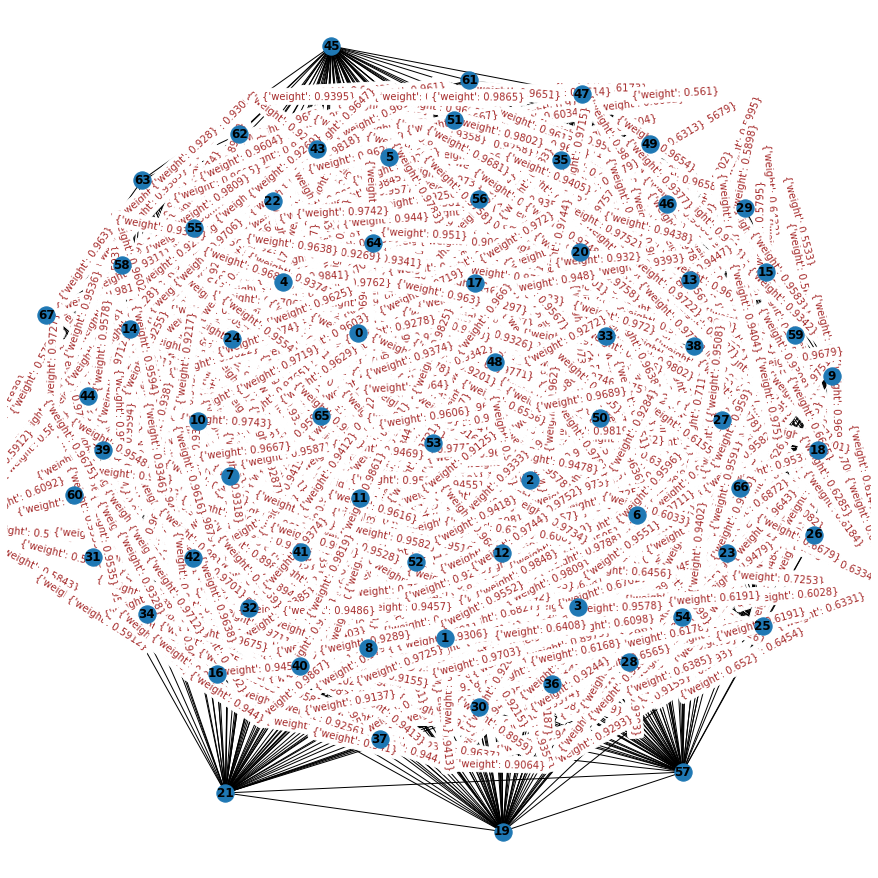

In [32]:
def network_scores(sim_mat):
  nx_graph = nx.from_numpy_array(sim_mat)
  plt.figure(figsize=(12, 12))
  pos = nx.spring_layout(nx_graph)
  nx.draw(nx_graph, with_labels=True, font_weight='bold')
  nx.draw_networkx_edge_labels(nx_graph,pos,font_color='brown')
  scores = nx.pagerank(nx_graph)
  plt.savefig("TextRankBERTGraph.png")
  files.download("TextRankBERTGraph.png")
  plt.show()
  return scores

scores = network_scores(sim_mat)

In [33]:
for i in enumerate(sentences):
  print(i)

(0, 'Cricket grew out of the many stick-and-ball games played in England 500 years ago, under a variety of different rules.')
(1, 'The word bat is an old English word that simply means stick or club.')
(2, 'By the seventeenth century, cricket had evolved enough to be recognisable as a distinct game and it was popular enough for its fans to be fined for playing it on Sunday instead of going to church.')
(3, 'Till the middle of the eighteenth century, bats were roughly the same shape as hockey sticks, curving outwards at the bottom.')
(4, 'There was a simple reason for this: the ball was bowled underarm, along the ground and the curve at the end of the bat gave the batsman the best chance of making contact.')
(5, 'How that early version of cricket played in village England grew into the modern game played in giant stadiums in great cities is a proper subject for history because one of the uses of history is to understand how the present was made.')
(6, 'And sport is a large part of conte

In [34]:

ranked_sentences = sorted(((scores[i],i) for i,s in enumerate(sentences)), reverse=True)
arranged_sentences = sorted(ranked_sentences[0:int(len(sentences)*0.25)], key=lambda x:x[1])
summary ='\n'.join([sentences[x[1]] for x in arranged_sentences])

print("***SUMMARY***\n\n"+summary)

***SUMMARY***

This is particularly so, since the game was linked to the wider history of colonialism and nationalism and was in part shaped by the politics of religion and caste.
The social and economic history of England in the eighteenth and nineteenth centuries, crickets early years, shaped the game and gave cricket its unique nature.
For example, one of the peculiarities of Test cricket is that a match can go on for five days and still end in a draw.
Another curious characteristic of cricket is that the length of the pitch is specified  22 yards  but the size or shape of the ground is not.
Most other team sports, such as hockey and football lay down the dimensions of the playing area: cricket does not.
During the 1760s and 1770s it became common to pitch the ball through the air, rather than roll it along the ground.
In response, batsmen had to master timing and shot selection.
One immediate result was the replacement of the curved bat with the straight one.
All of this raised the

In [0]:
#writing the summary into a text file
from google.colab import files


filename = "Modified_TR_BERT_Summary.txt"

with open(filename,"w") as f:
  f.write(summary)

files.download(filename)